# IMPORT LIBRARIES

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# IMPORT DATASET

In [65]:
file_path = 'C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# DOWNSAMPLING

In [66]:
target_variable = 'Diabetes_012'
class_0 = df[df[target_variable] == 0]
class_1 = df[df[target_variable] == 1]
class_2 = df[df[target_variable] == 2]
downsampled_size = 4631
class_0_downsampled = class_0.sample(n=downsampled_size, random_state=42)
class_1_downsampled = class_1.sample(n=downsampled_size, random_state=42)
class_2_downsampled = class_2.sample(n=downsampled_size, random_state=42)
f_downsampled = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])
print(f_downsampled)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
162288           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
227646           0.0     1.0       0.0        1.0  32.0     1.0     0.0   
888              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
230094           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
134829           0.0     0.0       0.0        1.0  35.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
66672            2.0     1.0       1.0        1.0  35.0     1.0     0.0   
42017            2.0     1.0       1.0        1.0  32.0     1.0     1.0   
67332            2.0     0.0       0.0        1.0  26.0     1.0     0.0   
251948           2.0     0.0       1.0        1.0  26.0     0.0     0.0   
171966           2.0     1.0       0.0        1.0  29.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
162288                   

# DOWNSAMPLED COUNT

In [67]:
print("Class Distribution in Downsampled Data:")
print(f_downsampled[target_variable].value_counts())
print("Unique Classes in Downsampled Data:", f_downsampled[target_variable].unique())
print("Class Distribution in Downsampled Data:", f_downsampled[target_variable].value_counts())

Class Distribution in Downsampled Data:
Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64
Unique Classes in Downsampled Data: [0. 1. 2.]
Class Distribution in Downsampled Data: Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# DATA SPLIT

In [68]:
X = f_downsampled.drop(target_variable, axis=1)  
y = f_downsampled[target_variable] 
test_size = 0.2  
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size , stratify=y)


# RANDOM FOREST

In [69]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Predicted labels for the test set:", y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Predicted labels for the test set: [2. 0. 1. ... 1. 2. 1.]
Accuracy: 49.1183879093199 %
Confusion Matrix:
 [[574 198 154]
 [247 333 346]
 [154 315 458]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.62      0.60       926
         1.0       0.39      0.36      0.38       926
         2.0       0.48      0.49      0.49       927

    accuracy                           0.49      2779
   macro avg       0.49      0.49      0.49      2779
weighted avg       0.49      0.49      0.49      2779



# DATA VISUALIZATION

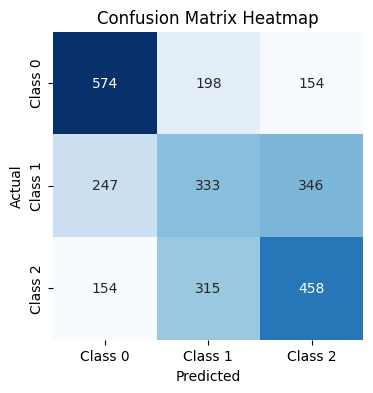

In [70]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# FEATURE RANKING

Random Forest Feature Importances: {'HighBP': 0.035814482377321245, 'HighChol': 0.029598586126766573, 'CholCheck': 0.004999475260256809, 'BMI': 0.16805645102593367, 'Smoker': 0.03576076087411446, 'Stroke': 0.013010446127977733, 'HeartDiseaseorAttack': 0.01754195432632308, 'PhysActivity': 0.02864495433093987, 'Fruits': 0.035507017163863515, 'Veggies': 0.028334307036152473, 'HvyAlcoholConsump': 0.010490105328968694, 'AnyHealthcare': 0.009872565028765674, 'NoDocbcCost': 0.016346440302672616, 'GenHlth': 0.07180086257397646, 'MentHlth': 0.06459299721369267, 'PhysHlth': 0.07455082581357012, 'DiffWalk': 0.020621788887953643, 'Sex': 0.03474601312181995, 'Age': 0.13139278617585115, 'Education': 0.06998601704342029, 'Income': 0.09833116385965951}


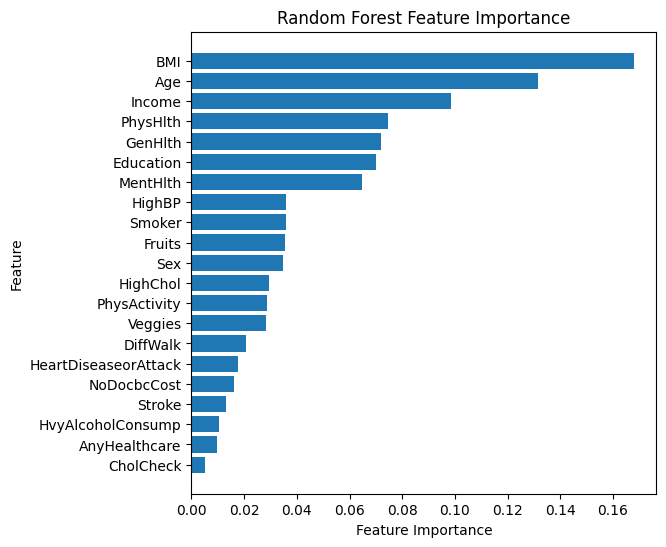

CholCheck: 0.004999475260256809
AnyHealthcare: 0.009872565028765674
HvyAlcoholConsump: 0.010490105328968694
Stroke: 0.013010446127977733
NoDocbcCost: 0.016346440302672616
HeartDiseaseorAttack: 0.01754195432632308
DiffWalk: 0.020621788887953643
Veggies: 0.028334307036152473
PhysActivity: 0.02864495433093987
HighChol: 0.029598586126766573
Sex: 0.03474601312181995
Fruits: 0.035507017163863515
Smoker: 0.03576076087411446
HighBP: 0.035814482377321245
MentHlth: 0.06459299721369267
Education: 0.06998601704342029
GenHlth: 0.07180086257397646
PhysHlth: 0.07455082581357012
Income: 0.09833116385965951
Age: 0.13139278617585115
BMI: 0.16805645102593367


In [71]:
feature_importances = rf_classifier.feature_importances_
feature_importances_rf = dict(zip(X_train.columns, rf_classifier.feature_importances_))
print(f'Random Forest Feature Importances: {feature_importances_rf}')
feature_names = list(X.columns)
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()
for i in sorted_idx:
    print(f'{feature_names[i]}: {rf_classifier.feature_importances_[i]}')